# TP1 - exercice 3 : $k$ plus proches voisins & validation croisée

Dans cet exercice nous allons apprendre à manipuler : 
1. la classe **KNeighborsClassifier** qui permet de réaliser de la classification par la méthode des $k$ plus proches voisins, 
2. les fonctions **cross_val_score**  et **cross_val_predict** qui permettent de réaliser des expériences de validation croisée.

Nous travaillerons pour cela sur le jeu de données **breast cancer** que l'on peut [charger à partir de scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) et dont on trouve un descriptif sur le [site de l'UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

Cet exercice nous permettra également d'illustrer l'importance de standardiser les descripteurs avec les $k$ plus proches voisins.

## Question 1. Charger le jeu de données en utilisant la fonction *load_breast_cancer*  du module *datasets*. En extraire le nombre d'observations et de descripteurs disponibles et représenter sous la forme d'un diagramme en bâton (barplot) les effectifs par classe. 

* Pour représenter les effectifs on pourra par exemple s'appuyer sur la fonction [*bincount*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html) du package NumPy et sur la fonction [*bar*](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html) du package MatPlotlib.

In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

(569, 30)
(569,)


<BarContainer object of 2 artists>

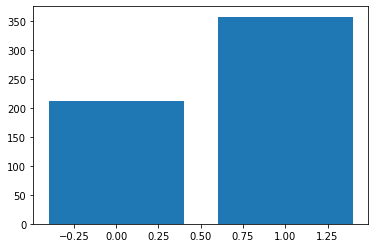

In [13]:
from sklearn import datasets
breast = datasets.load_breast_cancer()
X=breast.data
y=breast.target
print(X.shape)
print(y.shape)

plt.bar(range(2),np.bincount(y))
#plt.show

In [10]:
np.bincount(y)

array([212, 357], dtype=int64)

## Question 2. Estimer les performances de classification de l'algorithme des $k$ plus proches voisins par validation croisée pour $k \in \{1,3,5,7\}$ et en considérant  10 folds. Quel est l'intérêt d'utiliser un nombre impair de voisins ?

* on utilisera pour cela la classe [*KNeighborsClassifier*](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) du module *neighbors* et la fonction [*cross_val_score*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) du module *model_selection*.

{'whiskers': [<matplotlib.lines.Line2D at 0x17393c9b508>,
 'caps': [<matplotlib.lines.Line2D at 0x17393c9b848>,
 'boxes': [<matplotlib.lines.Line2D at 0x17393c89c08>,
 'medians': [<matplotlib.lines.Line2D at 0x1739399fa48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1739399ff88>,
 'means': []}

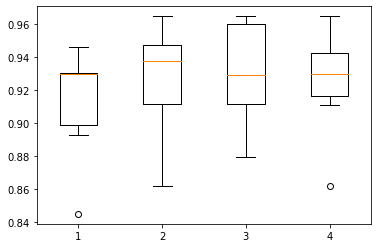

In [22]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

k= np.array(range(1,8,2))
cv = []
for i in k:
    knn =KNeighborsClassifier(n_neighbors=i)
    cv_perf=cross_val_score(knn,X,y,cv=10)
    cv.append(cv_perf)
    
plt.figure()
plt.boxplot(cv)
    



##  Question 3. La fonction *cross_val_score* calcule la performance de prédiction obtenue dans les différentes folds. Représenter par un "boxplot" la distribution des performances obtenues par fold pour les différentes valeurs de $k$, et sélectionner la valeur de $k$ conduisant à la meilleure performance médiane.

* On pourra s'appuyer sur la fonction [*boxplot*](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) du package MatplotLib. Elle permet de tracer sur un même graphique plusieurs boxplot à partir d'une matrice ou d'une liste.

In [23]:

knn =KNeighborsClassifier(n_neighbors=3)

## Question 4. Pour avoir une vision plus détaillée des résultats de classification il peut-être intéressant de calculer une matrice de confusion. La fonction [*cross_val_predict*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) du module *model_selection* permet de réaliser une expérience de validation croisée en fournissant les prédictions "brutes" plutôt qu'une mesure de performance de classification. 

## Utiliser cette fonction pour la valeur de $k$ retenue précédemment et calculer la matrice de confusion obtenue en utilisant la fonction [*confusion_matrix*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) du module *metrics*. Qu'observez-vous ? Utilisez la fonction [*classification_report*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) du module *metrics* pour calculer les indicateurs usuels que l'on peut déduire de cette matrice de confusion.

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

knn =KNeighborsClassifier(n_neighbors=3)

pred= cross_val_predict(knn,X,y,cv=10)

print(classification_report(y,pred))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       212
           1       0.93      0.96      0.94       357

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



## Question 5. Reprendre cette analyse en standardisant au préalable les descripteurs. Qu'observez-vous ?

* On pourra par exemple utiliser la classe [*StandardScaler*](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) du module *preprocessing* pour standardiser les descripteurs.


In [29]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
X_scale=scale.fit_transform(X)

knn =KNeighborsClassifier(n_neighbors=3)

pred= cross_val_predict(knn,X_scale,y,cv=10)

print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       212
           1       0.96      0.99      0.97       357

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.96      0.96       569



## Question 6. Quelles sont les limites de l'approche suivie dans cet exercice pour estimer les performances de prédiction ?